# SD212: Graph mining
## Lab 3: Graph clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results. 

## Import

In [50]:
from IPython.display import SVG

In [51]:
import numpy as np
from scipy import sparse

In [52]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [53]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [54]:
graph = grid(9, 9, True)
adjacency = graph.adjacency
position = graph.position

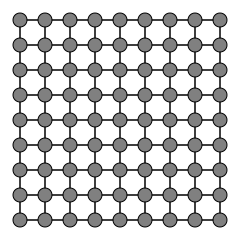

In [55]:
image = svg_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity.

In [56]:
louvain = Louvain()

In [57]:
labels = louvain.fit_predict(adjacency)

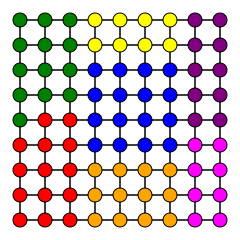

In [58]:
image = svg_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [59]:
get_modularity(adjacency, labels)

0.6220341435185185

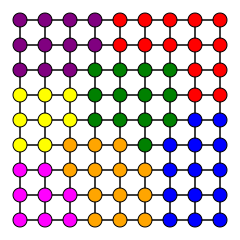

In [60]:
# Shuffling the nodes
n = adjacency.shape[0]
permutation = np.random.permutation(n)
adjacency = adjacency[permutation, :][:, permutation]
position = position[permutation, :]
labels = louvain.fit_predict(adjacency)
# Plotting the Louvain communities
image = svg_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [61]:

get_modularity(adjacency, labels)

0.613136574074074

Even if we shuffle the nodes, there is the same amount of clusters and all clusters keeps the same amount of nodes

In [75]:
# Using label propagation to find a better clustering than Louvain in terms of modularity.



ImportError: cannot import name 'KMeans' from 'sknetwork.clustering' (C:\Users\ttper\AppData\Roaming\Python\Python311\site-packages\sknetwork\clustering\__init__.py)

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [62]:
graph = karate_club(metadata=True)

In [63]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

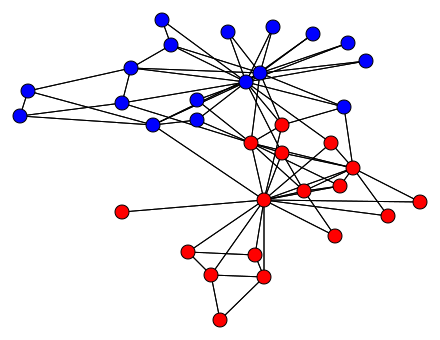

In [64]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels.
* Give the modularity.
* Display the aggregate graph (use ``display_node_weight`` to show the volume of each cluster).
* Display the bipartite graph between clusters and ground-truth labels (use sparse matrix multiplications to get the biadjacency matrix).
* Adapt the resolution to get 2 clusters and repeat the experiments.

In [65]:
louvain = Louvain()

In [66]:
labels = louvain.fit_predict(adjacency)

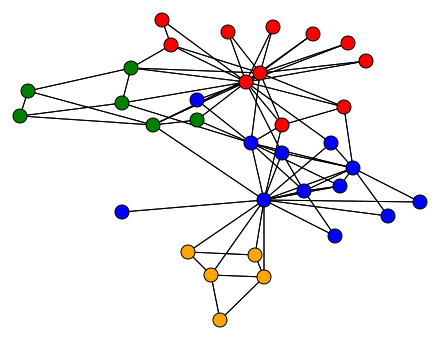

In [67]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [68]:
get_modularity(adjacency, labels)

0.4188034188034188

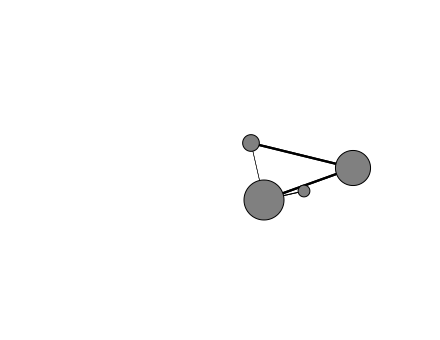

In [72]:
adjacency_aggregate = louvain.aggregate_

# Display the aggregate graph (use ``display_node_weight`` to show the volume of each cluster).
image = svg_graph(adjacency_aggregate, position, labels=labels, display_node_weight=True)
SVG(image)


## Openflights


In [ ]:
graph = openflights

In [ ]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [ ]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? Check the function ``modularity``.<br>
How do you interpret the *inverse* of the Simpson index?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Which of these clusters has the highest inside / outside / total traffic in number of flights?
* Which of these clusters is the strongest?<br>
Display the original graph with the strength of each cluster.

## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Which of these clusters is the strongest? the weakest?
* Display the bipartite graph linking these clusters to their ground-truth labels.
* Display the same graph restricted to the main ground-truth labels of each cluster, each representing at least 10% of the labels of the cluster.
* Repeat the same experiments at resolution 2.

## 3. Bipartite graphs

## Cinema

In [ ]:
graph = cinema

In [ ]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Cluster the graph by Louvain (resolution 1). 
* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of these cluster in terms of Personalized PageRank.
* Give the strongest cluster among all clusters with at least 100 movies.